In [1]:
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter
from pathlib import Path

# t-SNE

In [2]:
from sklearn.manifold import TSNE

In [3]:
# set random_state for reproducibility
tsne = TSNE(n_components=2, random_state=1)

In [4]:
param_id = 201
dirpath = Path.home() / 'hoyong/research/structure/result/mul_gpu/bn_cnn_mnist_{:04d}'.format(param_id)
actv_filepath_tr = dirpath / 'actv_tr_{:04d}.pkl'.format(param_id)
actv_filepath_ts = dirpath / 'actv_ts_{:04d}.pkl'.format(param_id)

In [5]:
with open(actv_filepath_tr, 'rb') as f:
    actv_tr = pkl.load(f)

In [6]:
with open(actv_filepath_ts, 'rb') as f:
    actv_ts = pkl.load(f)

### 1. t-SNE로 visualization하고자 하는 vector와 각 vector에 대한 label을 list에 assign

In [ ]:
# *numpy array로 변경 필요

In [7]:
# x_actv_{tr,ts}: list of vectors
# y_actv_{tr,ts}: list of labels
# idx2tgt_{tr,ts}: dictionary of i-th input sample's label / {i: label}

In [8]:
x_actv_tr, y_actv_tr = [], []
for idx, v_tr in enumerate(actv_tr):
    x_actv_tr.append(v_tr)
    y_actv_tr.append(idx2tgt_tr[idx])

NameError: name 'idx2tgt_tr' is not defined

In [23]:
x_actv_ts, y_actv_ts = [], []
for idx, v_ts in enumerate(actv_ts):
    x_actv_ts.append(v_ts)
    y_actv_ts.append(idx2tgt_ts[idx])

In [24]:
x_actv_tr = np.vstack(x_actv_tr)
x_actv_ts = np.vstack(x_actv_ts)

In [26]:
print(x_actv_tr.shape, x_actv_ts.shape)

(60000, 84) (10000, 84)


### 2. train t-SNE on vectors

In [ ]:
# *trainset, testset 같이 학습시켜야 같은 space에 나타낼 수 있음

In [27]:
x_actv_total = np.vstack((x_actv_tr, x_actv_ts))

In [28]:
x_actv_res = tsne.fit_transform(x_actv_total)

In [29]:
x_actv_res_tr = x_actv_res[:x_actv_tr.shape[0]]
x_actv_res_ts = x_actv_res[x_actv_tr.shape[0]:]

### 3. visualize the result of t-SNE

In [ ]:
# 아래 예제는 MNIST dataset에 대하여
# (1) trainset(marker: '.')과 testset(marker: 'x')를 구분하고
# (2) 10개 class를 색깔별로 구분
# 하여 t-SNE 결과를 시각화하는 코드

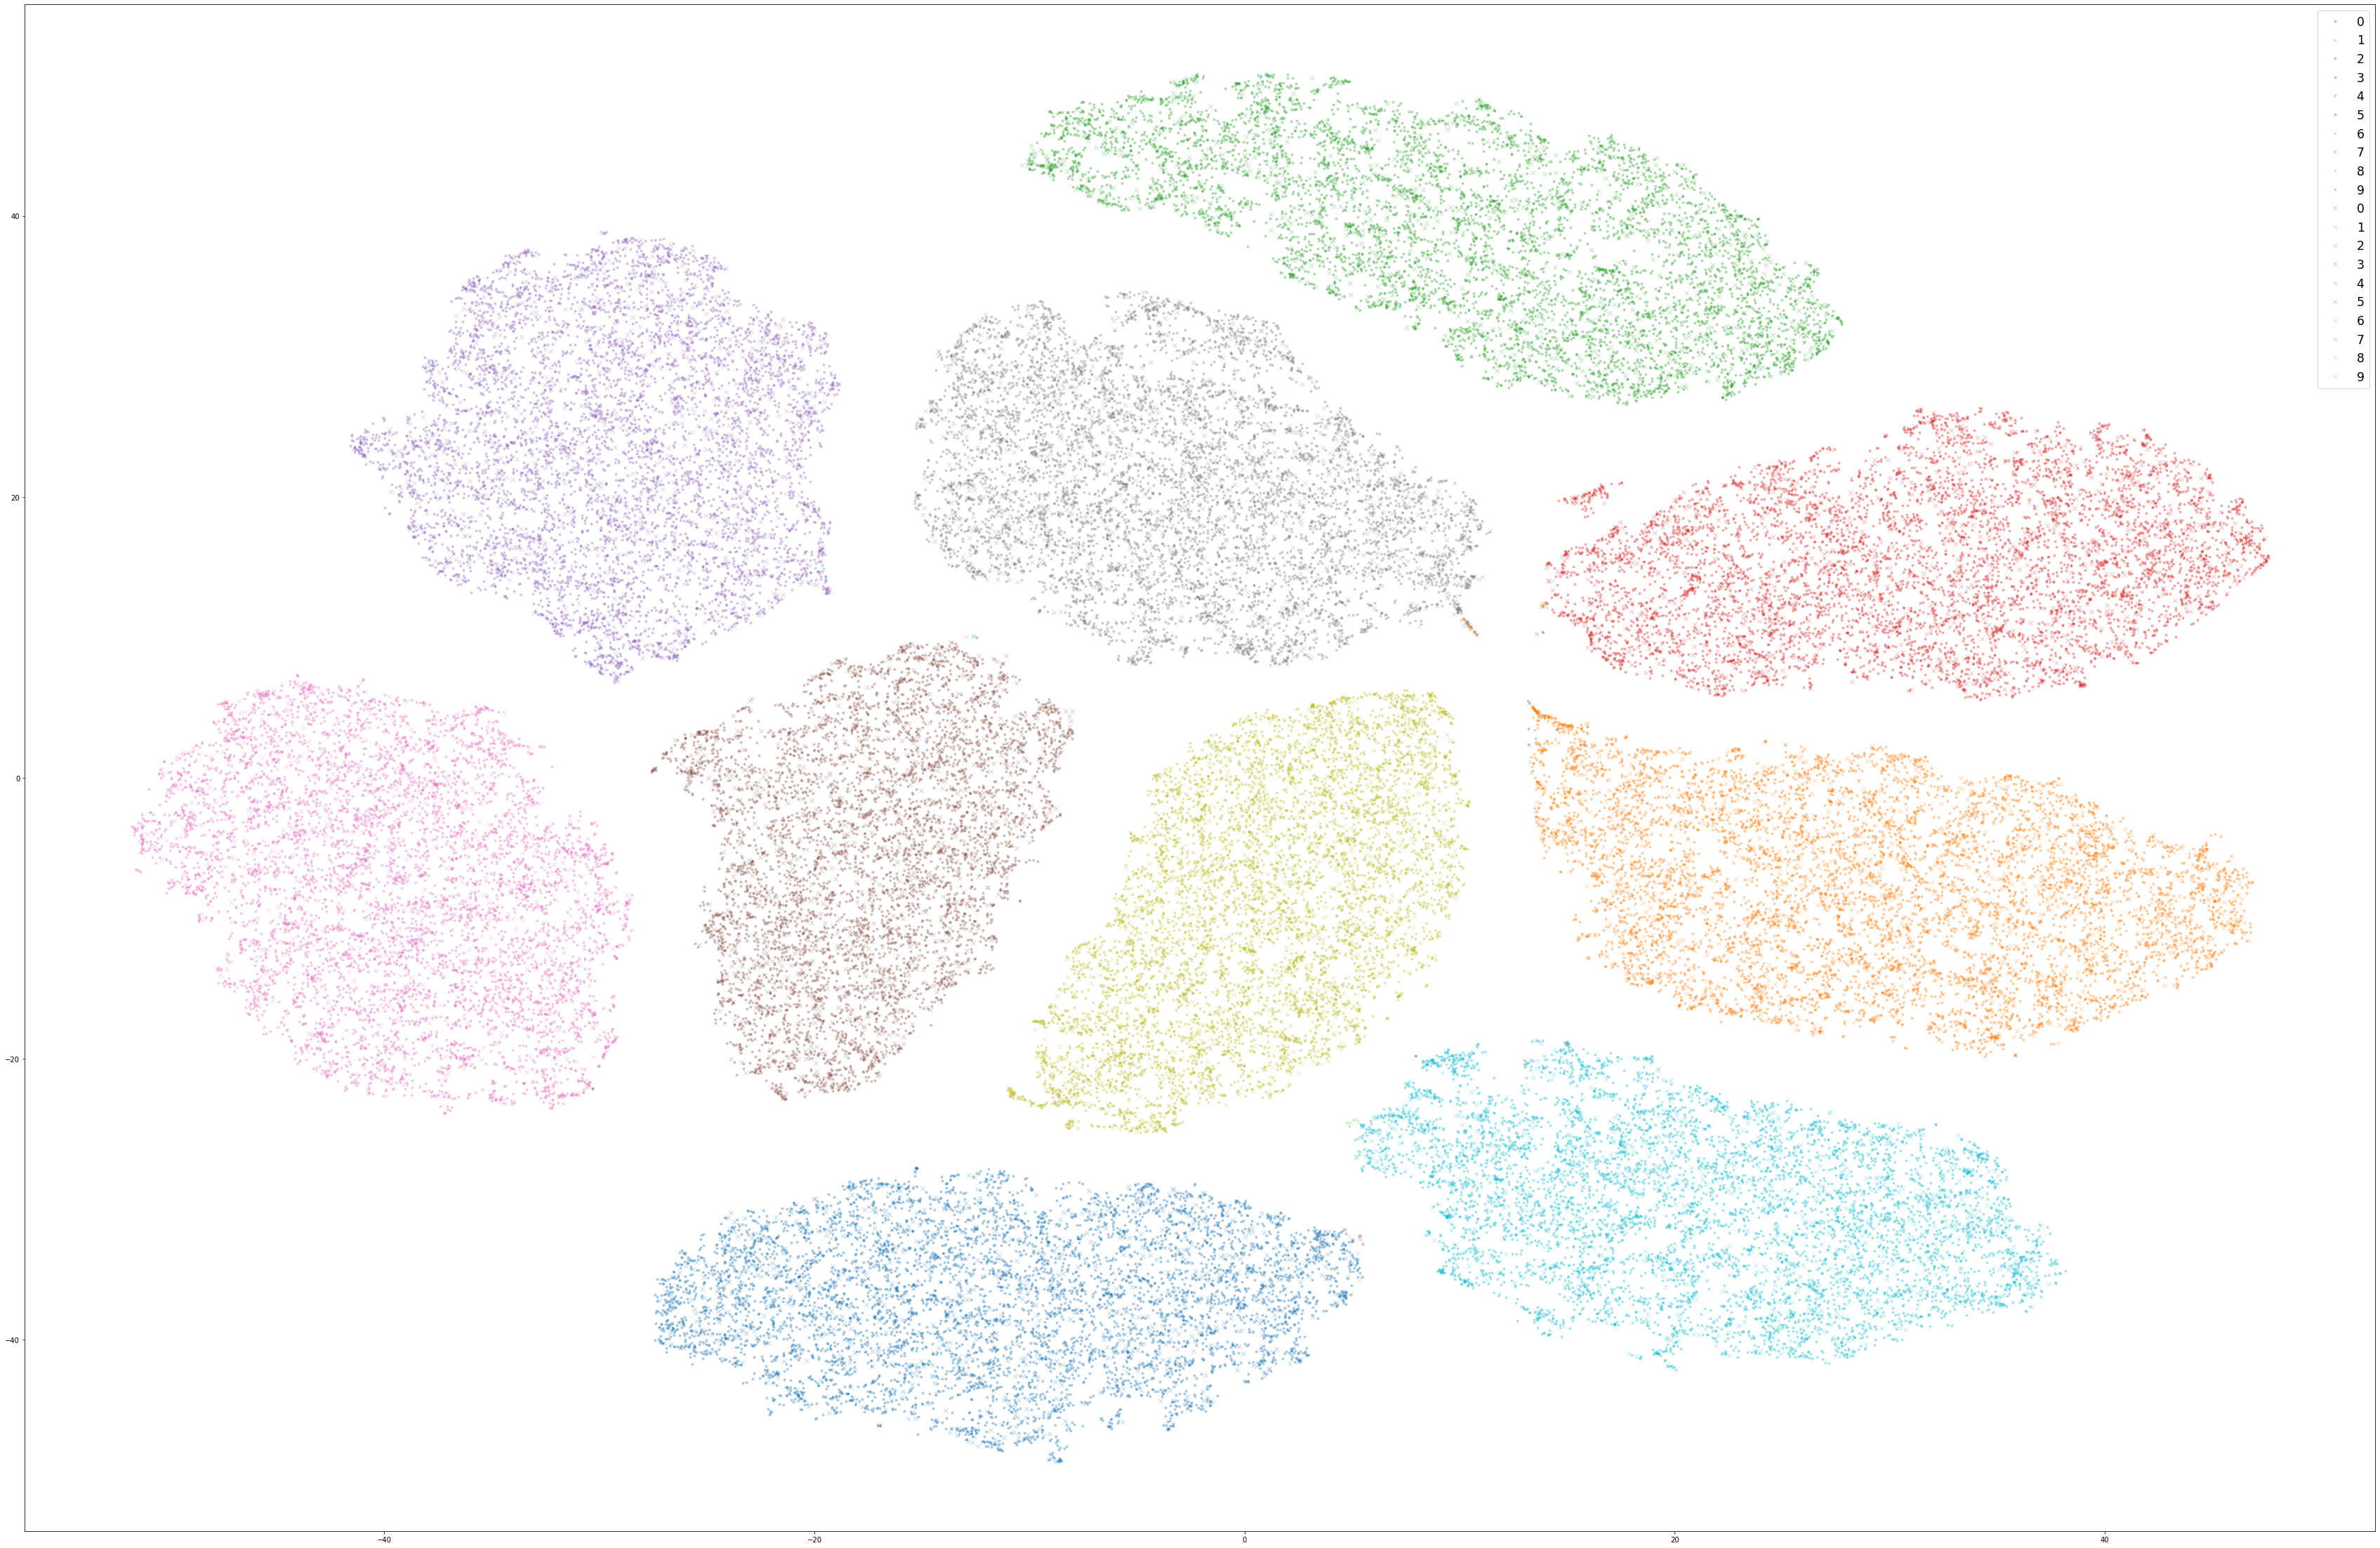

In [37]:
plt.figure(figsize=(60, 40))
for i in range(10):
    plt.plot(x_actv_res_tr[np.where(np.array(y_actv_tr)==i)][:,0],
             x_actv_res_tr[np.where(np.array(y_actv_tr)==i)][:,1],
             '.', label=str(i), alpha=0.3)
for i in range(10):
    plt.plot(x_actv_res_ts[np.where(np.array(y_actv_ts)==i)][:,0],
             x_actv_res_ts[np.where(np.array(y_actv_ts)==i)][:,1],
             'x', label=str(i), alpha=0.3)
plt.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0), fontsize='xx-large')
plt.show()
plt.close()